## **IMPORTING LIBRARIES**

In [22]:
#libraries required for data manipulation 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for modelling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer #diff cols--->diff transformations
from sklearn.pipeline import Pipeline #check, changes applied consistently both prediction and training time ( willl convert both into a singl object )
from sklearn.impute import SimpleImputer #for handling the mising values of the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report, roc_curve, confusion_matrix, auc

## **importing the data and taking a quick overview of it**

In [2]:
src_data=pd.read_csv('data/speeddating (1).csv')
src_data.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'


###  **DATA DESCRIPTION**

In [3]:
src_data.describe(include='all')

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
count,8378,8378.000000,8378,8283.000000,8274.000000,8378.000000,8378,8378,8378,8378,...,8378,8378,8138.000000,8069.000000,8378,8378,8003.000000,8378,8378,8378
unique,1,NaN,2,NaN,NaN,NaN,4,6,6,2,...,3,3,NaN,NaN,3,3,NaN,2,2,2
top,b'',NaN,b'male',NaN,NaN,NaN,b'[2-3]',b'European/Caucasian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[0-2]',NaN,NaN,b'[6-8]',b'[5-6]',NaN,b'0',b'0',b'0'
freq,8378,NaN,4194,NaN,NaN,NaN,2406,4727,4722,5062,...,7346,4514,NaN,NaN,4827,3199,NaN,4860,4863,6998
mean,NaN,11.350919,NaN,26.358928,26.364999,4.185605,NaN,NaN,NaN,NaN,...,NaN,NaN,6.134087,5.207523,NaN,NaN,0.049856,NaN,NaN,NaN
std,NaN,5.995903,NaN,3.566763,3.563648,4.596171,NaN,NaN,NaN,NaN,...,NaN,NaN,1.841285,2.129565,NaN,NaN,0.282168,NaN,NaN,NaN
min,NaN,1.000000,NaN,18.000000,18.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,7.000000,NaN,24.000000,24.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,5.000000,4.000000,NaN,NaN,0.000000,NaN,NaN,NaN
50%,NaN,11.000000,NaN,26.000000,26.000000,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,6.000000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN
75%,NaN,15.000000,NaN,28.000000,28.000000,5.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,7.000000,7.000000,NaN,NaN,0.000000,NaN,NaN,NaN


In [13]:
src_data.info(verbose=True) #gives info about the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    expected_num_interested_in_me    float64
 1    expected_num_matches             float64
 2    shared_interests_o               float64
 3    shared_interests_partner         float64
 4    ambitous_o                       float64
 5    ambition_partner                 float64
 6    funny_o                          float64
 7    funny_partner                    float64
 8    intelligence_o                   float64
 9    intelligence_partner             float64
 10   sinsere_o                        float64
 11   sincere_partner                  float64
 12   attractive_o                     float64
 13   attractive_partner               float64
 14   age                              float64
 15   age_o                            float64
 16   importance_same_race             float64

In [10]:
src_data.nunique() #gives info about the unique values of each column

expected_num_interested_in_me    18
expected_num_matches             17
shared_interests_o               15
shared_interests_partner         15
ambitous_o                       16
                                 ..
d_like                            3
d_guess_prob_liked                3
decision                          2
decision_o                        2
match                             2
Length: 123, dtype: int64

In [15]:
src_data.columns.to_list()

['expected_num_interested_in_me',
 'expected_num_matches',
 'shared_interests_o',
 'shared_interests_partner',
 'ambitous_o',
 'ambition_partner',
 'funny_o',
 'funny_partner',
 'intelligence_o',
 'intelligence_partner',
 'sinsere_o',
 'sincere_partner',
 'attractive_o',
 'attractive_partner',
 'age',
 'age_o',
 'importance_same_race',
 'importance_same_religion',
 'attractive_important',
 'sincere_important',
 'intellicence_important',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'pref_o_shared_interests',
 'pref_o_ambitious',
 'pref_o_funny',
 'pref_o_intelligence',
 'pref_o_sincere',
 'pref_o_attractive',
 'met',
 'guess_prob_liked',
 'like',
 'interests_correlate',
 'shared_interests_important',
 'ambtition_important',
 'funny_important',
 'intelligence',
 'sincere',
 'attractive',
 'ambition',
 'funny',
 'expected_happy_with_sd_people',


### **CHECKING FOR MISSING/NULL VALUES**

In [4]:
pd.set_option('display.max_rows', None)
print(src_data.isnull().sum().sort_values(ascending=False))
# Reset to default afterward if desired
pd.reset_option('display.max_rows')

expected_num_interested_in_me      6578
expected_num_matches               1173
shared_interests_o                 1076
shared_interests_partner           1067
ambitous_o                          722
ambition_partner                    712
met                                 375
funny_o                             360
funny_partner                       350
guess_prob_liked                    309
intelligence_o                      306
intelligence_partner                296
sinsere_o                           287
sincere_partner                     277
like                                240
attractive_o                        212
attractive_partner                  202
interests_correlate                 158
pref_o_shared_interests             129
shared_interests_important          121
pref_o_ambitious                    107
attractive                          105
ambition                            105
funny                               105
intelligence                        105


## **FIXING THE MISSING  VALUES**

In [5]:
# Create transformer groups
high_missing_cols = ['expected_num_interested_in_me', 'expected_num_matches', 
                    'shared_interests_o', 'shared_interests_partner']

perception_cols = ['ambitous_o', 'ambition_partner', 'funny_o', 'funny_partner', 
                  'intelligence_o', 'intelligence_partner', 'sinsere_o', 'sincere_partner',
                  'attractive_o', 'attractive_partner']

demographic_cols = ['age', 'age_o']

preference_cols = ['pref_o_shared_interests', 'pref_o_ambitious', 'pref_o_funny', 
                  'pref_o_intelligence', 'pref_o_sincere', 'pref_o_attractive']

# Additional columns with missing values
remaining_numeric_cols = ['met', 'guess_prob_liked', 'like', 'interests_correlate']
importance_cols = ['shared_interests_important', 'ambtition_important', 'funny_important']
attribute_cols = ['intelligence', 'sincere', 'attractive', 'ambition', 'funny']
expected_cols = ['expected_happy_with_sd_people']

# Find columns with exactly 79 missing values for interest_cols
interest_cols = [col for col in src_data.columns if src_data[col].isna().sum() == 79]

# Define transformers with appropriate strategies
transformers=[
    ('highMissing', SimpleImputer(strategy='median'), high_missing_cols), 
    ('perceptions', SimpleImputer(strategy='mean'), perception_cols),
    ('demographics', SimpleImputer(strategy='median'), demographic_cols),
    ('interests', SimpleImputer(strategy='median'), interest_cols),
    ('preferences', SimpleImputer(strategy='mean'), preference_cols),
    ('remainingNumeric', SimpleImputer(strategy='median'), remaining_numeric_cols),
    ('importance', SimpleImputer(strategy='median'), importance_cols),
    ('attributes', SimpleImputer(strategy='median'), attribute_cols),
    ('expected', SimpleImputer(strategy='median'), expected_cols)
]

# Create the column transformer
preprocessor = ColumnTransformer(transformers)

# Transform the data
imputed_data = preprocessor.fit_transform(src_data)

# Combine all columns in transformers
all_cols_in_transformers = (high_missing_cols + perception_cols + demographic_cols + 
                           interest_cols + preference_cols + remaining_numeric_cols + 
                           importance_cols + attribute_cols + expected_cols)

# Get columns that weren't part of the transformation
other_cols = [col for col in src_data.columns if col not in all_cols_in_transformers]

# Create the new DataFrame with imputed data
imputed_df = pd.DataFrame(
    imputed_data, 
    columns=all_cols_in_transformers
)

# Add back any columns that weren't part of the transformation
for col in other_cols:
    imputed_df[col] = src_data[col].values

# Replace original data with imputed data
src_data = imputed_df.copy()

In [6]:
pd.set_option('display.max_rows', None)
print(src_data.isnull().sum().sort_values(ascending=False))
# Reset to default afterward if desired
pd.reset_option('display.max_rows')

expected_num_interested_in_me      0
d_sincere_partner                  0
d_ambition                         0
d_funny                            0
d_intelligence                     0
d_sincere                          0
d_attractive                       0
d_shared_interests_important       0
d_ambtition_important              0
d_funny_important                  0
d_intellicence_important           0
d_sincere_important                0
d_attractive_important             0
d_shared_interests_o               0
d_ambitous_o                       0
d_funny_o                          0
d_intelligence_o                   0
d_sinsere_o                        0
d_attractive_o                     0
d_pref_o_shared_interests          0
d_pref_o_ambitious                 0
d_pref_o_funny                     0
d_pref_o_intelligence              0
d_pref_o_sincere                   0
d_pref_o_attractive                0
field                              0
d_importance_same_religion         0
d

## **DISTRIBUTION ANALYSIS**

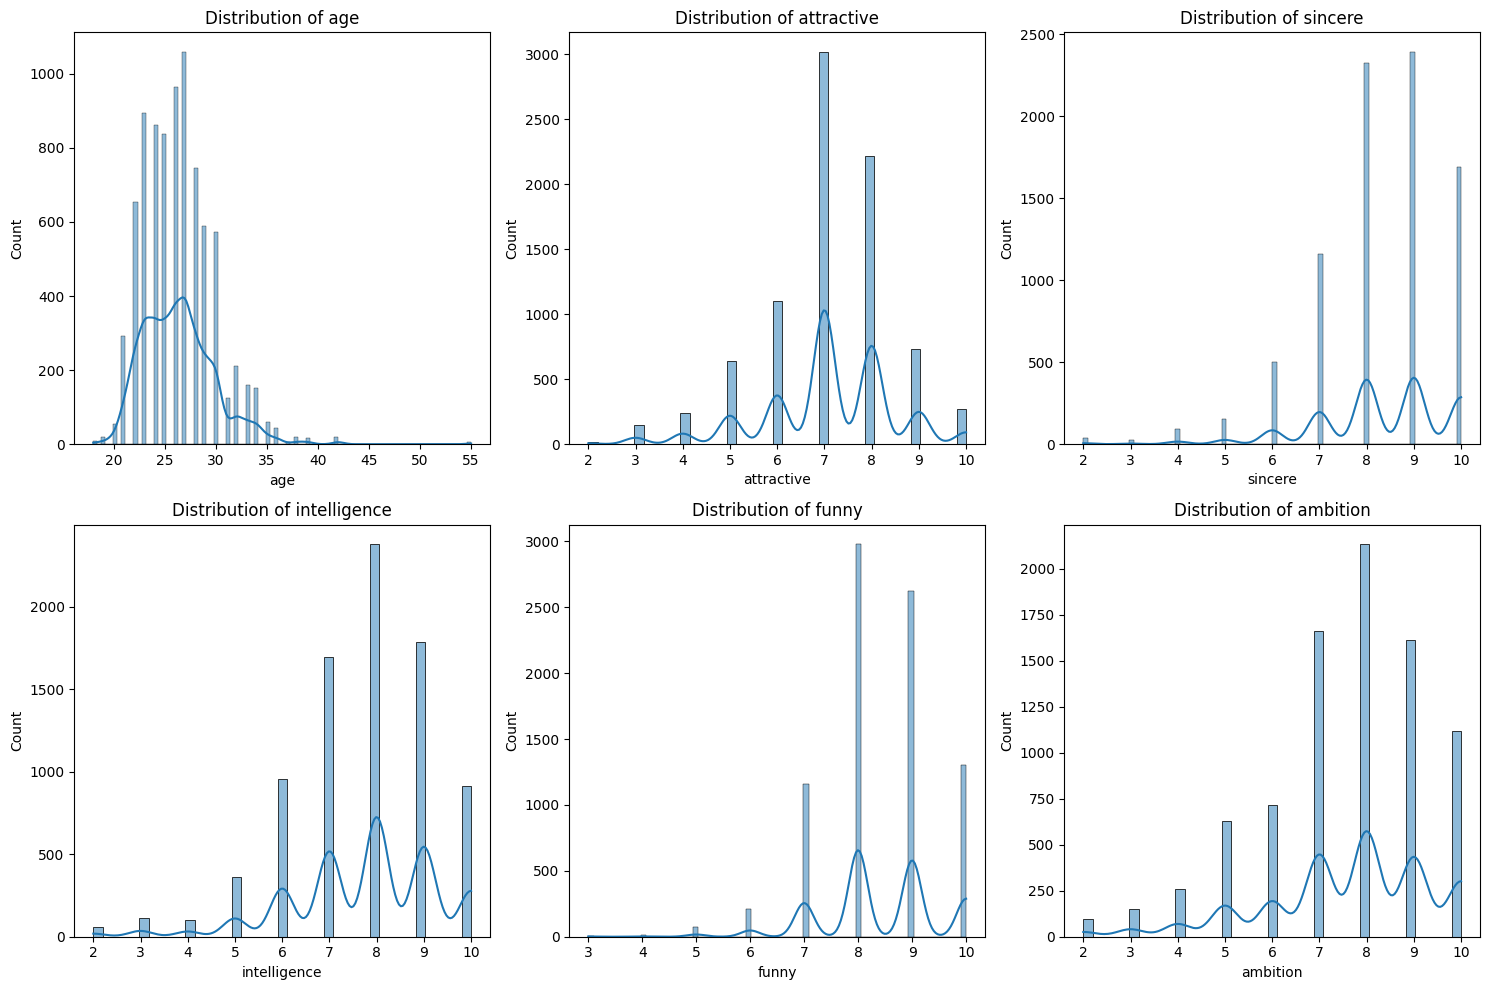

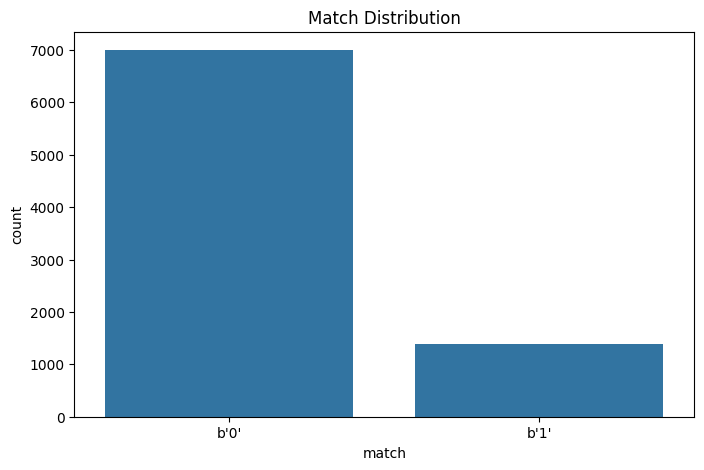

In [19]:
# Distribution of key numerical variables
key_numerics = ['age', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(key_numerics):
    if col in src_data.columns:
        sns.histplot(src_data[col].dropna(), ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Distribution of match outcomes
if 'match' in src_data.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='match', data=src_data)
    plt.title('Match Distribution')
    plt.show()